# CLassifier

In [45]:
import numpy as np
from sklearn.cross_validation import train_test_split
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop


In [62]:
feature_arrays, label_arrays = np.load('feature_semaforos.npy'), np.load('label_semaforos.npy')

In [63]:
for i , value in enumerate(label_arrays):
    if value == 'green':
        label_arrays[i] = 1
    elif value =='black':
        label_arrays[i] = 0
    elif value == 'red':
        label_arrays[i] = 2
    else:
        print('nothing to do')

In [72]:
x_train, x_test, y_train, y_test = train_test_split(feature_arrays, label_arrays, test_size=0.2, random_state=42)


In [73]:
batch_size = 32
num_classes = 3
epochs = 20

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)

y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train.shape)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(576,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

model.save('semaphoro_model.h5')

print('Test loss:', score[0])
print('Test accuracy:', score[1])


1440 train samples
361 test samples
(1440, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               295424    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 1539      
Total params: 559,619
Trainable params: 559,619
Non-trainable params: 0
_________________________________________________________________
Train on 1440 samples, validate on 361 samples
Epoch 1/20
 480/1440 [=========>...........

/home/stanlee321/.local/share/virtualenvs/cntk/lib/python3.5/site-packages/cntk/core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input1878") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


1440/1440 [==============================] - 1s 378us/step - loss: 0.6848 - acc: 0.8000 - val_loss: 0.4078 - val_acc: 0.9141
Epoch 2/20
1440/1440 [==============================] - 0s 235us/step - loss: 0.3482 - acc: 0.9292 - val_loss: 0.2358 - val_acc: 0.9557
Epoch 3/20
1440/1440 [==============================] - 0s 236us/step - loss: 0.1855 - acc: 0.9549 - val_loss: 0.1391 - val_acc: 0.9612
Epoch 4/20
1440/1440 [==============================] - 0s 279us/step - loss: 0.1368 - acc: 0.9646 - val_loss: 0.1156 - val_acc: 0.9640
Epoch 5/20
1440/1440 [==============================] - 0s 270us/step - loss: 0.1533 - acc: 0.9660 - val_loss: 0.1625 - val_acc: 0.9695
Epoch 6/20
1440/1440 [==============================] - 0s 219us/step - loss: 0.1005 - acc: 0.9722 - val_loss: 0.1436 - val_acc: 0.9668
Epoch 7/20
1440/1440 [==============================] - 0s 266us/step - loss: 0.1083 - acc: 0.9708 - val_loss: 0.2646 - val_acc: 0.9557
Epoch 8/20
1440/1440 [==============================] - 0s 

# TEST MODEL

In [6]:
def preprocess_input(x):
    x = x / 255
    x = x.reshape((1,576))
    return x

Using CNTK backend


[[  0.00000000e+00   1.00000000e+00   1.01558615e-35]]


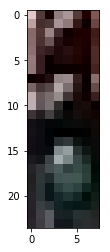

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

import numpy as np
from keras.models import load_model
from keras.preprocessing import image

img_path = './1.png'
img = image.load_img(img_path, target_size=(24, 8))
imshow(img)

model = load_model('semaphoro_model20epochs.h5')

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(model.predict(x))

In [92]:
a = [  0.00000000e+00, 1.00000000e+00, 1.01558615e-35]
max(a)

1.0

In [95]:
a.index(max(a))

1

[[ 0.  1.  0.]]


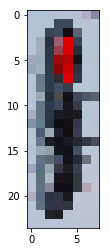

In [106]:
img_path = './3.jpg'
img = image.load_img(img_path, target_size=(24, 8))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(model.predict(x))

In [101]:
a = [  3.13613059e-11,   6.36859145e-03,   9.93631363e-01]
a.index(max(a))

2

[[  0.00000000e+00   3.09766114e-21   1.00000000e+00]]


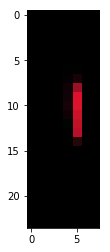

In [102]:
img_path = './6.jpg'
img = image.load_img(img_path, target_size=(24, 8))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(model.predict(x))

[[ 0.  1.  0.]]


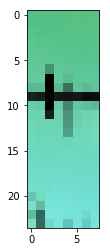

In [103]:
img_path = './4.jpg'
img = image.load_img(img_path, target_size=(24, 8))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(model.predict(x))

# KERAS TO CNTK

In [121]:
# KERAS TO CNTK
import cntk

keras_model = load_model('semaphoro_model20epochs.h5')

cntk.combine(keras_model.model.outputs).save('my_semaphoro_cntk_model.cntk')

cntk_model = cntk.load_model('my_semaphoro_cntk_model.dnn')

print('model loadded', type(cntk_model))


model loadded <class 'cntk.ops.functions.Function'>


In [122]:
loaded_model = cntk.load_model('my_semaphoro_cntk_model.cntk')

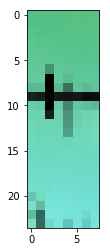

In [8]:
from cntk.ops.functions import load_model

z = load_model("my_semaphoro_cntk_model.cntk")

img_path = './4.jpg'
img = image.load_img(img_path, target_size=(24, 8))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

predictions = np.squeeze(z.eval({z.arguments[0]:[x]}))
top_class = np.argmax(predictions)

In [9]:
print(predictions)

[ 0.  1.  0.]


In [10]:
print(top_class)

1
